In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

a = pd.read_excel("motor price.xlsx")
a.head(10)


,year,cost
0,2005,27911
1,2007,37709
2,2001,8816
3,2009,46048
4,2001,6241
5,2002,11041
6,2007,35644
7,2010,48322
8,2006,30783
9,2001,6349


In [26]:
x = a["year"]
y = a["cost"]

x = np.array(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

slope, intercept, r, p, std_err = stats.linregress(x,y)

x = x.reshape(-1,1)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train.reshape(-1,1),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


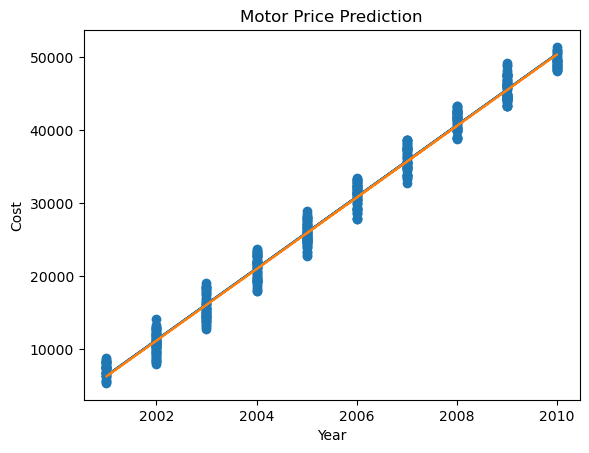

In [27]:
plt.scatter(x, y)

def myfunc(v):
    return slope * v + intercept

scipy_line = list(map(myfunc, x.flatten()))
plt.plot(x, scipy_line)

y_line = clf.predict(x)
plt.plot(x, y_line)

plt.xlabel("Year")
plt.ylabel("Cost")
plt.title("Motor Price Prediction")
plt.show()


In [28]:
y_pred = clf.predict(x_test.reshape(-1,1))
print(y_pred)

[45490.22330573 20951.58141685 20951.58141685 20951.58141685
 40582.49492796  6228.39628352 11136.1246613  11136.1246613
 11136.1246613  20951.58141685  6228.39628352 30767.0381724
 45490.22330573 50397.95168351 45490.22330573 35674.76655018
 11136.1246613  30767.0381724  25859.30979463 40582.49492796
 30767.0381724  25859.30979463 11136.1246613  20951.58141685
 11136.1246613  40582.49492796 16043.85303907 45490.22330573
 25859.30979463 11136.1246613  45490.22330573 50397.95168351
 45490.22330573 11136.1246613   6228.39628352 11136.1246613
 40582.49492796 45490.22330573 30767.0381724   6228.39628352
 30767.0381724  50397.95168351 11136.1246613  40582.49492796
 25859.30979463 16043.85303907 25859.30979463 16043.85303907
 40582.49492796 11136.1246613  45490.22330573 30767.0381724
 11136.1246613  25859.30979463 45490.22330573 35674.76655018
 30767.0381724  11136.1246613  40582.49492796 45490.22330573
 35674.76655018 45490.22330573 11136.1246613  20951.58141685
 20951.58141685 20951.581416

In [29]:
print("Intercept:",intercept)
print("Slope:",slope)

Intercept: -9811519.593069289
Slope: 4906.478626184395


In [30]:
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y_test,y_pred))

r2_score: 0.9871670522221588


In [31]:
new_year = [[2026]]
x_new = clf.predict(new_year)
print(x_new)


[128921.60572794]
